# Presence and Severity of Heart Disease Prediction Project

In [1]:
# Data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [2]:
# ML libraraies
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning


In [3]:
data = pd.read_csv('heart_disease.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
data.sample(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
238,239,49,Female,Cleveland,atypical angina,134.0,271.0,False,normal,162.0,False,0.0,flat,0.0,normal,0
392,393,47,Male,Hungary,asymptomatic,140.0,276.0,True,normal,125.0,True,0.0,NaN,NaN,NaN,0
139,140,51,Male,Cleveland,non-anginal,125.0,245.0,True,lv hypertrophy,166.0,False,2.4,flat,0.0,normal,0


In [5]:
data.drop(columns = ['id'], inplace = True)

In [6]:
data.sample(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
186,42,Male,Cleveland,non-anginal,120.0,240.0,True,normal,194.0,False,0.8,downsloping,0.0,reversable defect,0
7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
45,58,Male,Cleveland,non-anginal,112.0,230.0,False,lv hypertrophy,165.0,False,2.5,flat,1.0,reversable defect,4


# Data Exploration

In [7]:
data['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [8]:
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [9]:
data.rename(columns = {'dataset':'dataset_location','cp':'chest_pain','trestbps':'resting_systolic_blood_pressure','chol':'cholesterol','fbs':'fasting_blood_sugar','restecg':'resting_electrocardiographic_results','thalch':'max_heart_rate_achieved',
                       'exang':'exercise_induced_angina', 'ca':'coronary_angiography'}, inplace = True)

In [10]:
data.sample(2)

,age,sex,dataset_location,chest_pain,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,coronary_angiography,thal,num
769,42,Male,VA Long Beach,non-anginal,134.0,240.0,NaN,normal,160.0,False,0.0,NaN,NaN,NaN,0
636,52,Male,Switzerland,asymptomatic,95.0,0.0,NaN,normal,82.0,True,NaN,NaN,NaN,NaN,2


In [11]:
data['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [12]:
(data.isnull().sum()/data.shape[0])*100

age                                      0.000000
sex                                      0.000000
dataset_location                         0.000000
chest_pain                               0.000000
resting_systolic_blood_pressure          6.413043
cholesterol                              3.260870
fasting_blood_sugar                      9.782609
resting_electrocardiographic_results     0.217391
max_heart_rate_achieved                  5.978261
exercise_induced_angina                  5.978261
oldpeak                                  6.739130
slope                                   33.586957
coronary_angiography                    66.413043
thal                                    52.826087
num                                      0.000000
dtype: float64

In [13]:
data['resting_systolic_blood_pressure'].fillna(data['resting_systolic_blood_pressure'].median(), inplace = True)

In [14]:
data['cholesterol'].fillna(data['cholesterol'].median(), inplace = True)

In [15]:
data['fasting_blood_sugar'].fillna(data['fasting_blood_sugar'].mode(), inplace = True)

In [16]:
data.drop(columns = ['coronary_angiography'], axis = 1, inplace = True) # Null values is more than 60% of data, so, we delete the column

In [17]:
data.drop(columns = ['thal'], axis = 1, inplace = True) # Null values is more than 50% of data, so, we delete the column.

In [18]:
data['slope'].fillna(value = data['slope'].mode()[0],inplace =True) # Null values is  33% of data, so, we replace it with the mode value "flat".

In [19]:
data[data['oldpeak'] < 0] = data[data['oldpeak'] < 0] * -1 # oldpeak value has to be between 0:6.2, so we correct the values by multiply by -1.

In [20]:
data['oldpeak'].fillna(value = data['oldpeak'].median(), inplace = True) # oldpeak null value we replaced it with the median value. 

In [21]:
data['exercise_induced_angina'].fillna(value = data['exercise_induced_angina'].mode()[0], inplace = True)

In [22]:
data[data['exercise_induced_angina'] == -1].index # [609, 656, 694]  # rows with values= (-1)


Index([609, 656, 694], dtype='int64')

In [23]:
data.drop(index = [609, 656, 694], inplace = True)  # These rows has "exercise_induced_angina" value = -1 so, we remove it.

In [24]:
data[(data['max_heart_rate_achieved']<70)].index

Index([603, 614, 615, 629, 631, 653, 655, 677, 691, 696, 705, 725, 800], dtype='int64')

In [25]:
data.drop(index = [603, 614, 615, 629, 631, 653, 655, 677, 691, 696, 705, 725, 800], inplace = True)  # These rows has "max_heart_rate_achieved" value < 70 and negative values so, we remove it.

In [26]:
data['max_heart_rate_achieved'].fillna(value = data['max_heart_rate_achieved'].median(), inplace =True) # We replace the null values with the mean value

In [27]:
data['resting_electrocardiographic_results'].fillna(value = data['resting_electrocardiographic_results'].mode()[0], inplace = True)

In [28]:
data['fasting_blood_sugar'].fillna(value = data['fasting_blood_sugar'].mode()[0], inplace = True)

In [29]:
data[(data['resting_systolic_blood_pressure'] <90) ].index

Index([644, 753], dtype='int64')

In [30]:
data.drop(index =[644, 753], inplace = True ) # pressure values out of the range (90:200) not correct so, we remove it.

In [31]:
data[data['cholesterol'] >564].index

Index([546], dtype='int64')

In [32]:
data.drop(index = [546], inplace= True) # We remove that row because the it out of the normal range (80:564)

In [33]:
data['cholesterol'].replace(0, data['cholesterol'].median(), inplace =True) # Replaceing values which is equal (0) with the median value.

In [34]:
data['exercise_induced_angina']=data['exercise_induced_angina'].astype('bool')

In [35]:
data['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76, 28, 30, 31, 32, 33, 36, 72, 73, 75],
      dtype=int64)

In [36]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
data['dataset_location'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [38]:
data['chest_pain'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [39]:
data['resting_electrocardiographic_results'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [40]:
data['fasting_blood_sugar'].unique()

array([ True, False])

In [41]:
data[(data['max_heart_rate_achieved'] <70) | (data['max_heart_rate_achieved'] >202)] # Normal range for max_heart_rate_achieved (70 -202) from medical report

,age,sex,dataset_location,chest_pain,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num


In [42]:
data[(data['cholesterol'] <80) | (data['cholesterol'] >564)] # Normal range for cholesterol (80 -564) from medical report

,age,sex,dataset_location,chest_pain,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num


In [43]:
data[(data['resting_systolic_blood_pressure'] <90) | (data['resting_systolic_blood_pressure'] >200)] # Normal range for cholesterol (90 -200) from medical report

,age,sex,dataset_location,chest_pain,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num


In [44]:
data[(data['oldpeak'] <0) | (data['oldpeak'] >6.2)] # Normal range for cholesterol (0 -6.2) from medical report

,age,sex,dataset_location,chest_pain,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num


In [45]:
heart_disease_diagnosis = ['Absence of heart disease','Mild degree of heart disease','Moderate degree of heart disease','Severe degree of heart disease', 'Critical degree of heart disease']

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   901 non-null    int64  
 1   sex                                   901 non-null    object 
 2   dataset_location                      901 non-null    object 
 3   chest_pain                            901 non-null    object 
 4   resting_systolic_blood_pressure       901 non-null    float64
 5   cholesterol                           901 non-null    float64
 6   fasting_blood_sugar                   901 non-null    bool   
 7   resting_electrocardiographic_results  901 non-null    object 
 8   max_heart_rate_achieved               901 non-null    float64
 9   exercise_induced_angina               901 non-null    bool   
 10  oldpeak                               901 non-null    float64
 11  slope                   

In [47]:
data.to_csv('clean_data.csv')

# Data visualization

In [48]:
def countPlot(column_name,title, xlabel, ylabel, barcolor):
    ax = data[column_name].value_counts().plot(kind = 'bar', rot = 30,color= barcolor, edgecolor = 'black',linewidth = 1.3)
    plt.title(title)
    plt.xlabel(xlabel,fontsize = 12, fontweight = 'bold')
    plt.ylabel(ylabel)
    ax.bar_label(ax.containers[0], fontsize = 12, fontweight = 'bold', padding = 2)

def piePlot(column_name,title, colors_list):
    data[column_name].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', colors = colors_list ,shadow = True,startangle = 90,explode =[0.05,0])
    plt.title(title)

    

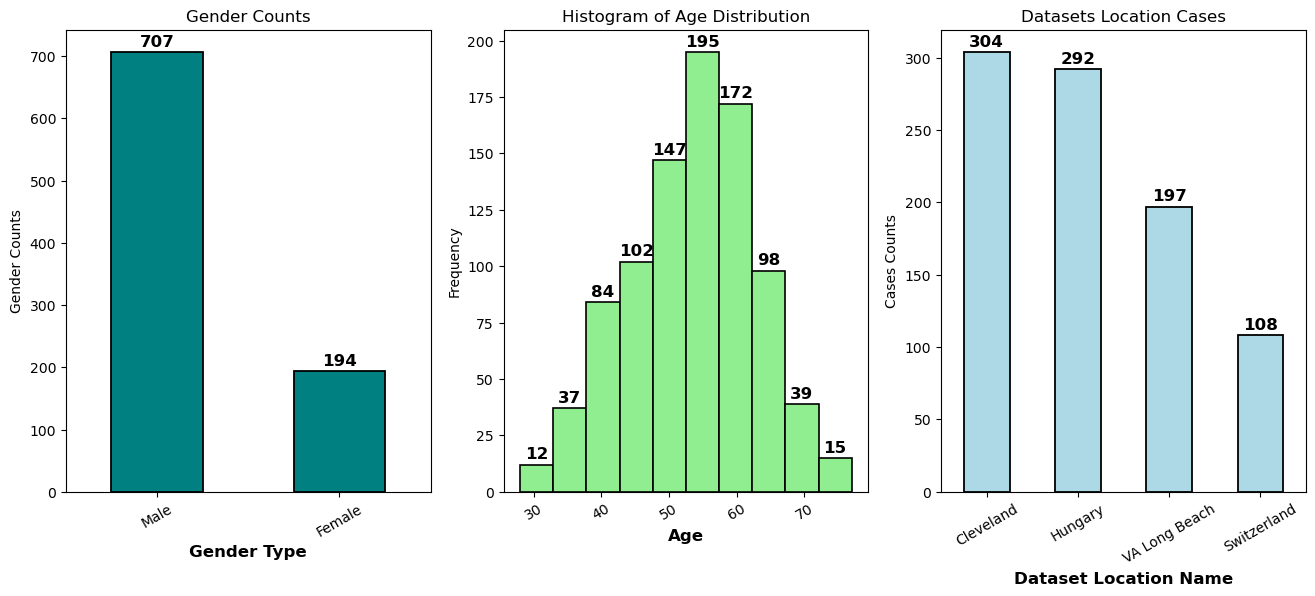

In [49]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
countPlot('sex', 'Gender Counts', 'Gender Type', 'Gender Counts', 'teal')
plt.subplot(1,3,2)
ax = data['age'].plot(kind = 'hist', rot = 30, color='lightgreen', edgecolor = 'black', linewidth = 1.2)
plt.title('Histogram of Age Distribution')
plt.xlabel('Age',fontsize = 12, fontweight = 'bold')
plt.ylabel('Frequency')
ax.bar_label(ax.containers[0], fontsize = 12, fontweight = 'bold', padding = 2)

plt.subplot(1,3,3)
countPlot('dataset_location', 'Datasets Location Cases', 'Dataset Location Name', 'Cases Counts', 'lightblue')

plt.show()


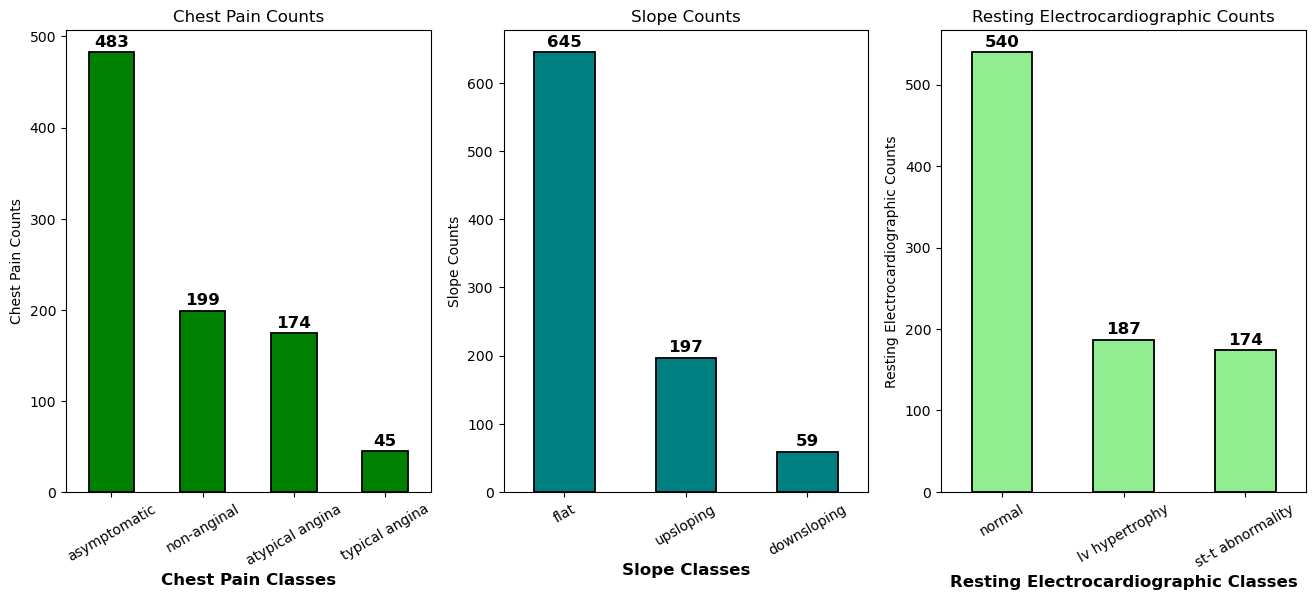

In [50]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
countPlot('chest_pain', 'Chest Pain Counts', 'Chest Pain Classes', 'Chest Pain Counts','green')
plt.subplot(1,3,2)
countPlot('slope', 'Slope Counts', 'Slope Classes', 'Slope Counts', 'teal')
plt.subplot(1,3,3)
countPlot('resting_electrocardiographic_results', 'Resting Electrocardiographic Counts', 'Resting Electrocardiographic Classes', 'Resting Electrocardiographic Counts', 'lightgreen')
plt.show()

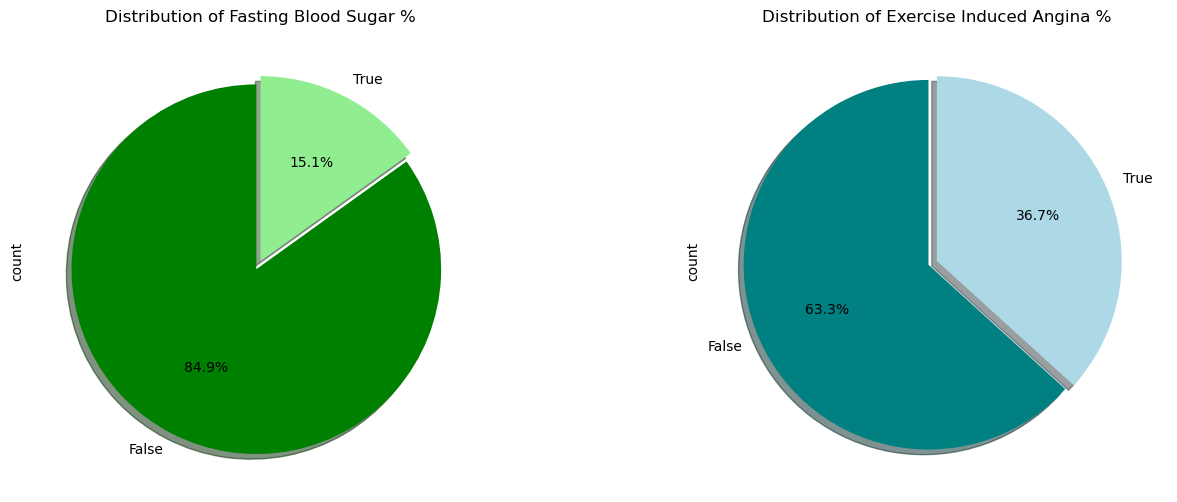

In [51]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
piePlot('fasting_blood_sugar','Distribution of Fasting Blood Sugar %', ['green', 'lightgreen'])

plt.subplot(1,2,2)
data['exercise_induced_angina'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%',colors = ['teal', 'lightblue'],shadow = True,startangle = 90,explode =[0.05,0])
plt.title('Distribution of Exercise Induced Angina %')
plt.show()

<Axes: >

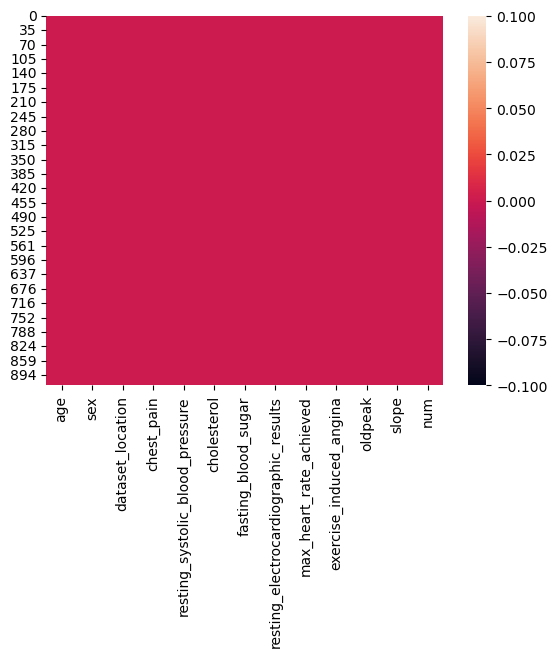

In [52]:
sns.heatmap(data.isna())  # Heat map for null values

In [53]:
data.head(3)

,age,sex,dataset_location,chest_pain,resting_systolic_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1


In [54]:
x = data[['age','sex','chest_pain','resting_systolic_blood_pressure','cholesterol','fasting_blood_sugar','resting_electrocardiographic_results','max_heart_rate_achieved','exercise_induced_angina','oldpeak','slope']]
y = data[['num']]

# Baseline Experiment

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [56]:
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state = 42)
dummy_model.fit(x_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [57]:
dummy_pred_y = dummy_model.predict(x_test)
dummy_accuracy = accuracy_score(y_test, dummy_pred_y)
print(f'The dummy model accuracy: {round(dummy_accuracy * 100,2)} %') # Baseline accuracy

The dummy model accuracy: 44.2 %


In [58]:
#Cross validation technique
score_accuarcy = cross_val_score(dummy_model, x,y, cv = 8, scoring = 'accuracy')
meanScore = score_accuarcy.mean()
print(f'The dummy model accuracy: {round(meanScore * 100,2)} %')

The dummy model accuracy: 45.06 %


In [59]:
def ClassificationReport(model, x_test, y_test, model_name):
    predicted_y = model.predict(x_test)
    report = classification_report(y_test, predicted_y)
    print(f'-------{model_name} -- Classification Report --------')
    print(report)
ClassificationReport(dummy_model, x_test, y_test, 'Dummy model')   

-------Dummy model -- Classification Report --------
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        80
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         7

    accuracy                           0.44       181
   macro avg       0.09      0.20      0.12       181
weighted avg       0.20      0.44      0.27       181



# Data Preprocessing

In [60]:
numerical_features = x.select_dtypes(include=['int64','float64']).columns.tolist()
# numerical_features

In [61]:
categorical_features = x.select_dtypes(include = ['object','bool','category']).columns.tolist()
# categorical_features

In [62]:
# Preprocessing Pipeline
numerical_pipeline = Pipeline(steps = [('scaling',StandardScaler())])
categorical_pipeline = Pipeline(steps = [('encoding', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessing = ColumnTransformer(transformers = [
    ('numerical_preprocessing', numerical_pipeline, numerical_features),
    ('categorical_preprocessing', categorical_pipeline, categorical_features)
])

# Multi_class Classification

# Logistic Regression Model

In [63]:
LR_pipeline_model = Pipeline(steps = [
    ('preprocessing',preprocessing),
    ('model', LogisticRegression())
])
LR_pipeline_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_systolic_blood_pressure',
                                                   'cholesterol',
                                                   'max_heart_rate_achieved',
                                                   'oldpeak']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'chest_pain',
                                                   'fasting_blood_sugar',
                                                   'resting_electrocardiographic_results',
                                                   'exercise_induced_angina',
                                                   'slope'])])),
                ('model', LogisticRegression())])

In [64]:
# Accuracy from Train test splite Method
def LR_accuracy(x_train, y_train, x_test, y_test):
    LR_pipeline_model.fit(x_train, y_train)
    print(f'Accuracy of training data {round(LR_pipeline_model.score(x_train, y_train)*100,2)}%')
    print(f'Accuracy of test data {round(LR_pipeline_model.score(x_test, y_test)*100,2)} %')
LR_accuracy(x_train, y_train, x_test, y_test)

Accuracy of training data 60.83%
Accuracy of test data 50.83 %


In [65]:
# f1-score 
def LR_f1_score(x_test, y_test):
    predicted_y = LR_pipeline_model.predict(x_test)
    f1_score_micro = f1_score(y_test, predicted_y, average = 'micro')
    f1_score_macro = f1_score(y_test, predicted_y, average = 'macro')
    print('------ F1-Score Result --------')
    print(f'f1_score_micro :{round(f1_score_micro*100, 2)} %')
    print(f'f1_score_macro :{round(f1_score_macro*100, 2)} %')
LR_f1_score(x_test, y_test)  

------ F1-Score Result --------
f1_score_micro :50.83 %
f1_score_macro :23.99 %


# RandomForestClassifier

In [66]:
RF_pipeline_model = Pipeline(steps = [
    ('preprocessing', preprocessing),
    ('model', RandomForestClassifier())
])
RF_pipeline_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_systolic_blood_pressure',
                                                   'cholesterol',
                                                   'max_heart_rate_achieved',
                                                   'oldpeak']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'chest_pain',
                                                   'fasting_blood_sugar',
                                                   'resting_electrocardiographic_results',
                                                   'exercise_induced_angina',
                                                   'slope'])])),
                ('model', RandomForestClassifier())])

In [67]:
def RF_accuracy(x_train, y_train, x_test, y_test):
    RF_pipeline_model.fit(x_train, y_train)
    print(f'Accuracy of training data {round(RF_pipeline_model.score(x_train, y_train)*100,2)}%')
    print(f'Accuracy of test data {round(RF_pipeline_model.score(x_test, y_test)*100,2)} %')
RF_accuracy(x_train, y_train, x_test, y_test)

Accuracy of training data 100.0%
Accuracy of test data 53.04 %


In [68]:
def RF_f1_score(x_test,y_test):
    predicted_y = RF_pipeline_model.predict(x_test)
    f1_score_micro = f1_score(y_test, predicted_y, average = 'micro')
    f1_score_macro = f1_score(y_test, predicted_y, average = 'macro')
    print('------ F1-Score Result --------')
    print(f'f1_score_micro :{round(f1_score_micro*100, 2)} %')
    print(f'f1_score_macro :{round(f1_score_macro *100, 2)} %')
RF_f1_score(x_test,y_test)

------ F1-Score Result --------
f1_score_micro :53.04 %
f1_score_macro :30.06 %


In [69]:
def cross_accuracy(model, x, y, cv):
    score = cross_val_score(model, x, y, cv = cv)
    mean_score = score.mean()
    print('------ Accuracy after using Cross val score function -------')
    print(f'Mean accuracy value: {round(mean_score*100,2)}%')
    

In [70]:
# Logistic Regression Accuracy by using Cross validation technique
cross_accuracy(LR_pipeline_model, x, y, 5)

------ Accuracy after using Cross val score function -------
Mean accuracy value: 53.49%


In [71]:
# Random forest Accuracy by using Cross validation technique
cross_accuracy(RF_pipeline_model, x, y, 5)

------ Accuracy after using Cross val score function -------
Mean accuracy value: 50.17%


# Binary Classification

In [72]:
data['new_target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

In [73]:
data[['num','new_target']].sample(3)

,num,new_target
122,0,0
697,2,1
862,2,1


In [74]:
data['new_target'].value_counts()

new_target
1    495
0    406
Name: count, dtype: int64

In [75]:
x = data[['age','sex','chest_pain','resting_systolic_blood_pressure','cholesterol','fasting_blood_sugar','resting_electrocardiographic_results','max_heart_rate_achieved','exercise_induced_angina','oldpeak','slope']]
y = data[['new_target']]

# Baseline Experiment

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state = 42)
dummy_model.fit(x_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [77]:
dummy_pred_y = dummy_model.predict(x_test)
dummy_accuracy = accuracy_score(y_test, dummy_pred_y)
print(f'The dummy model accuracy: {round(dummy_accuracy * 100,2)} %') # Baseline accuracy

The dummy model accuracy: 55.8 %


# Logistic Regression Model

In [78]:
# Train test splite method
LR_accuracy(x_train, y_train, x_test, y_test)

Accuracy of training data 81.94%
Accuracy of test data 77.9 %


In [79]:
cross_accuracy(LR_pipeline_model, x, y, 5)

------ Accuracy after using Cross val score function -------
Mean accuracy value: 78.25%


In [80]:
LR_f1_score(x_test, y_test) 

------ F1-Score Result --------
f1_score_micro :77.9 %
f1_score_macro :77.4 %


In [81]:
ClassificationReport(LR_pipeline_model, x_test, y_test, 'Logistic Regression model') 

-------Logistic Regression model -- Classification Report --------
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        80
           1       0.79      0.83      0.81       101

    accuracy                           0.78       181
   macro avg       0.78      0.77      0.77       181
weighted avg       0.78      0.78      0.78       181



# RandomForestClassifier

In [82]:
cross_accuracy(RF_pipeline_model, x, y, 9)

------ Accuracy after using Cross val score function -------
Mean accuracy value: 76.91%


In [83]:
RF_accuracy(x_train, y_train, x_test, y_test)

Accuracy of training data 100.0%
Accuracy of test data 76.24 %


In [84]:
RF_f1_score(x_test,y_test)

------ F1-Score Result --------
f1_score_micro :76.24 %
f1_score_macro :75.95 %


In [85]:
ClassificationReport(RF_pipeline_model, x_test, y_test, 'Random Forest model') 

-------Random Forest model -- Classification Report --------
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        80
           1       0.79      0.78      0.79       101

    accuracy                           0.76       181
   macro avg       0.76      0.76      0.76       181
weighted avg       0.76      0.76      0.76       181



# Check another models

In [86]:
def accuarcy_comparison(models, x, y, cv):
    for index, model in enumerate(models):
        score = cross_val_score(model, x, y, cv = cv)
        accuracy = round(score.mean()*100,2)
        if index == 0:
            print(f'Accuracy of DT_model: {accuracy} %')
        elif index == 1:
             print(f'Accuracy of KNN_model: {accuracy} %')
        else: 
             print(f'Accuracy of SVM_model: {accuracy} %')
        
        

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [88]:
DT_pipeline_model = Pipeline(steps = [
    ('preprocessing',preprocessing),
    ('model', DecisionTreeClassifier(criterion = 'entropy'))
])

KNN_pipeline_model = Pipeline(steps = [
    ('preprocessing',preprocessing),
    ('model', KNeighborsClassifier())
])

SVM_pipeline_model = Pipeline(steps = [
    ('preprocessing',preprocessing),
    ('model', SVC(kernel = 'rbf')) # 'rbf':Radial Basis Function is the most popular and versatile kernel available
])

models = [DT_pipeline_model, KNN_pipeline_model, SVM_pipeline_model]

In [89]:
accuarcy_comparison(models, x, y, 9) # Using Cross validation technique

Accuracy of DT_model: 63.36 %
Accuracy of KNN_model: 77.58 %
Accuracy of SVM_model: 78.69 %


# Tunning the LogistcRegression model

In [90]:
param_grid = {
    'model__penalty':['l2','l1'], #l1: lasso & l2: Ridge the type of regularization applied
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], #The Regularization Strength (C)
    'preprocessing__numerical_preprocessing__scaling__with_mean': [True, False]
}
grid_model = GridSearchCV(estimator = LR_pipeline_model, param_grid = param_grid, scoring = 'f1', cv = 6)
grid_model.fit(x_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical_preprocessing',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'resting_systolic_blood_pressure',
                                                                          'cholesterol',
                                                                          'max_heart_rate_achieved',
                                                                          'oldpeak']),
                                                                        ('categorical_preprocessing',
                                                                         Pipeline(steps=[('encoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'chest_pain',
                                                                          'fasting_blood_sugar',
                                                                          'resting_electrocardiographic_results',
                                                                          'exercise_induced_angina',
                                                                          'slope'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'model__penalty': ['l2', 'l1'],
                         'preprocessing__numerical_preprocessing__scaling__with_mean': [True,
                                                                                        False]},
             scoring='f1')

In [91]:
grid_model.best_params_

{'model__C': 0.01,
 'model__penalty': 'l2',
 'preprocessing__numerical_preprocessing__scaling__with_mean': True}

In [92]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_systolic_blood_pressure',
                                                   'cholesterol',
                                                   'max_heart_rate_achieved',
                                                   'oldpeak']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'chest_pain',
                                                   'fasting_blood_sugar',
                                                   'resting_electrocardiographic_results',
                                                   'exercise_induced_angina',
                                                   'slope'])])),
                ('model', LogisticRegression(C=0.01))])

In [93]:
best_model = grid_model.best_estimator_

In [94]:
print(f'The highest mean f1-score for LogisticRegression Model: {round(grid_model.best_score_ *100,2)} %')

The highest mean f1-score for LogisticRegression Model: 82.16 %


In [95]:
#The highest mean f1-score for LogisticRegression Model: 82.16 % at cv = 6
# The highest mean accuracy for LogisticRegression Model: 80.42 % at cv = 6

# Tunning the SVM model

In [96]:
param_grid = {
    'model__gamma':[0.001, 0.01, 0.1, 1], 
    'model__C': [0.1, 1, 10, 100],
    'preprocessing__numerical_preprocessing__scaling__with_mean': [True, False]
}
grid_model_SVC = GridSearchCV(estimator = SVM_pipeline_model, param_grid = param_grid, scoring = 'f1', cv = 10)
grid_model_SVC.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical_preprocessing',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'resting_systolic_blood_pressure',
                                                                          'cholesterol',
                                                                          'max_heart_rate_achieved',
                                                                          'oldpeak']),
                                                                        ('categorical_preprocessing',
                                                                         Pipeline(steps=[('encoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'chest_pain',
                                                                          'fasting_blood_sugar',
                                                                          'resting_electrocardiographic_results',
                                                                          'exercise_induced_angina',
                                                                          'slope'])])),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': [0.001, 0.01, 0.1, 1],
                         'preprocessing__numerical_preprocessing__scaling__with_mean': [True,
                                                                                        False]},
             scoring='f1')

In [97]:
grid_model_SVC.best_params_

{'model__C': 1,
 'model__gamma': 0.1,
 'preprocessing__numerical_preprocessing__scaling__with_mean': True}

In [98]:
grid_model_SVC.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_systolic_blood_pressure',
                                                   'cholesterol',
                                                   'max_heart_rate_achieved',
                                                   'oldpeak']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'chest_pain',
                                                   'fasting_blood_sugar',
                                                   'resting_electrocardiographic_results',
                                                   'exercise_induced_angina',
                                                   'slope'])])),
                ('model', SVC(C=1, gamma=0.1))])

In [99]:
print(f'The highest mean f1-score for SVC Model: {round(grid_model_SVC.best_score_ *100,2)} %')

The highest mean f1-score for SVC Model: 83.81 %


In [100]:
# The highest mean f1-score for SVC Model: 83.81 % at cv = 10
# The highest mean accuracy for SVC Model: 81.81 % at cv = 7

In [101]:
SVC_model = grid_model_SVC.best_estimator_

# Conclusion:
## 1)- Multi-class classification using LogisticRegression & RandomForestClassifier is very poor with an accuracy of 50% with that data, so we will make the problem a binary classification.
## 2)- Baseline accuracy is 55%.
## 3)- By using Train-test split technique with test-size =0.2, we get that:
#### a)- Accuracy score and f1-score are the same, 76.8% from the RF-model and 77.9% from the LR-model. 
## 4)- By using the cross-validation technique to train and test the model, we get that: 
#### a)- Max. accuracy from the LogisticRegression model is 78.25% at cv = 5.
#### b)- Max. accuracy from the RandomForestClassifier model is 77.6% at cv =9.
## 5)- By checking another model:
#### a)- We get max. Accuracy is 78.69% from the SVM model at cv = 9 by using the cross-validation technique. 
## 6)- From all notes, we get that:
#### a)- The LogisticRegression Model accuracy of 78.25%.
#### b)- The SVM model accuracy of 78.69%.
#### c)- We can use LogisticRegression or SVM model for our program.
#### d)- The program will be a binary classification model to predict if the patient is sick (class 0) or healthy (class 1).
## 7)- After Hyperparameter Tuning using GridSearchCV for LogisticRegression model, we get that:
#### a)- The highest mean accuracy for LogisticRegression Model: 80.42 % at cv = 6.
#### b)- The highest mean f1-score for LogisticRegression Model: 82.16 % at cv = 6.
## 8)- After Hyperparameter Tuning using GridSearchCV for SVC model, we get that:
#### a)- The highest mean f1-score for SVC Model: 83.81 % at cv = 10.
#### b)- The highest mean accuracy for SVC Model: 81.81 % at cv = 7.
## 9)- The data is imbalanced, so we will depend on the F1-score, which is:
#### a)- 82.16 % at cv = 6, for LogisticRegression, and I think it is acceptable for our program. 
#### b)- 83.81 % at cv = 10, for SVC model, and I think it is acceptable for our program also. 



# Making the model file

In [102]:
import pickle

In [103]:
with open('best_model_LR.pkl', 'wb') as file:
    pickle.dump(best_model,file)

In [104]:
with open('best_model_SVC.pkl', 'wb') as file:
    pickle.dump(SVC_model,file)